# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Soriano, Edneil E. Jr. \
_Student No._: 2020 - 02420 \
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Edneil E. Soriano Jr.

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **97**/100

Score breakdown:
* Problem 1 - 25/25
* Problem 2 - 25/25
* Problem 3 - 47/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

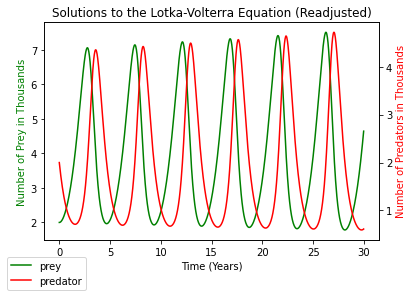

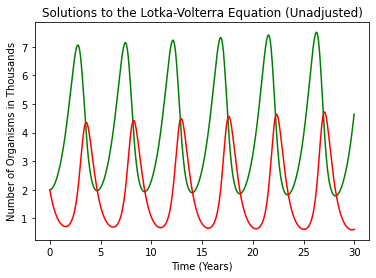

In [2]:
"""
We first define the differential equations as a function.

Args: r = x, y (array)
Output: f_x and f_y in an array

We can add a t-dependence of f(r) if we need to. But we would need to modify the RK4 equations and add another arg.
"""
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

def f(r): 
    x = r[0]                   # first element of array is x, second is y
    y = r[1]
    fx = alpha*x - beta*x*y    # the RHS of the 1st ode
    fy = gamma*x*y - delta*y   # the RHS of the 2nd ode
    f = np.array([fx, fy])     # store them in an array because I say so
    return f

start = 0
end = 30
N = 1000             # slices
h = (end - start)/N  # slice width, we will use this later for the rk4 formulas
r = np.array([2, 2], float)    # these are the initial values for x and y accdg. to the problem


def rk4_timeindependent(f, r, start, end, h):
    
    tpoints = np.arange(start, end, h)  # this is the x-axis for plots, accdg. to the question we go from 0 to 30
    xpoints = np.array([])
    ypoints = np.array([])

    for t in tpoints:
        xpoints = np.append(xpoints, r[0])   # for now, we append the initial values. Later the loop will go back here
        ypoints = np.append(ypoints, r[1])   # and we will append updated values for x and y as stored in r
        k1 = h*f(r)
        k2 = h*f(r + 0.5*k1)
        k3 = h*f(r + 0.5*k2)
        k4 = h*f(r + 0.5*k3)
        r += (k1 + 2*k2 + 2*k3 +k4)/6       # this is just the formula for 4th order RK
        
    return xpoints, ypoints, tpoints

data = rk4_timeindependent(f, r, start, end, h)    # call the function
x = data[0]
y = data[1]
t = data[2]  # plotting tym
    
fig, ax = plt.subplots()
plot = ax.plot(t, x, color='green', label = 'prey')
ax2 = ax.twinx()
plot2 = ax2.plot(t, y, color='red', label = 'predator')

# https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lns = plot+plot2
labs = [l.get_label() for l in lns]
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
ax.legend(lns, labs, bbox_to_anchor=(0.14, -0.055))

ax.set_title('Solutions to the Lotka-Volterra Equation (Readjusted)')
ax.set_ylabel('Number of Prey in Thousands', color='g')
ax.set_xlabel('Time (Years)')
ax2.set_ylabel('Number of Predators in Thousands', color='red')


plt.show()

fig2, ax = plt.subplots()
plot1 = ax.plot(t, x, color = 'green', label='prey')
plot2 = ax.plot(t, y, color = 'red', label = 'predator')
ax.set_title('Solutions to the Lotka-Volterra Equation (Unadjusted)')
ax.set_ylabel('Number of Organisms in Thousands')
ax.set_xlabel('Time (Years)')
plt.show()


We can see that from the first figure that the amplitudes of the two populations are very similar. This may be hard to see
in the unadjusted version in the second figure. They are not just correlated, they are PROPORTIONAL as we expected from
the differential equation. This may be a critique of using plain constants (alpha, etc..) to model populations. Life is much more complicated than 2 coupled ordinary differential equations. 

##### Comments - Leo

- **Score: 25/25**

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


In [3]:
"""
Below I commented my first attempt, na hindi namin malaman ni maam reina kung bakit ayaw gumana eh tama naman >:(
"""



# g = 9.81
# l = 0.1

# def f_pend(r):
#     theta = r[0]                     # IN RADIANS 
#     omega = r[1]
#     ftheta = omega 
#     fomega = -(g/l)*np.sin(theta)           # equation 8.45
#     f = np.array([ftheta, fomega], float)   # equation 8.46
#     return f        

# start = 0
# end = 20      # start and end time
# N = 1000      # slices, I choose the slices because 
# h = (end - start)/N

# r = np.array([3.12414, 0], float)    # since the bob is released from rest dtheta/dt or omega = 0

# data = rk4_timeindependent(f_pend, r, start, end, h)    # I can't assign the two following lines directly, np said "too many vals to unpack" :skull:
# theta_arr = data[0]
# omega_arr = data[1]
# t_points = data[2]

# # it's plotting tym mga daberkads

# fig, ax = plt.subplots()
# plot = ax.plot(t_points, theta_arr, color = 'orange', label = '$theta$')
# plt.legend()
# plt.show()


'\nBelow I commented my first attempt, na hindi namin malaman ni maam reina kung bakit ayaw gumana eh tama naman >:(\n'

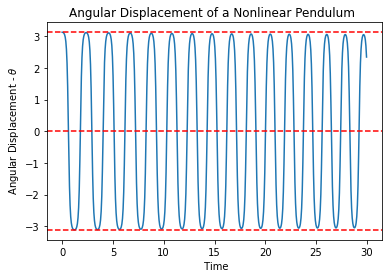

In [4]:
g = 9.81
l = 0.1

def f_pend(r):
    theta = r[0]                     # IN RADIANS 
    omega = r[1]
    ftheta = omega 
    fomega = -(g/l)*np.sin(theta)           # equation 8.45
    f = np.array([ftheta, fomega], float)   # equation 8.46
    return f   


start_pend = 0 
end_pend = 20
N = 1000
h_pend = (end - start)/N


t_pend = np.arange(start, end, h)         # time variable to be used in plot
theta_arr = np.array([])
omega_arr = np.array([])

r_pend = np.array([3.12414, 0], float)    # since the bob is released from rest dtheta/dt or omega = 0
"""
I wasn't able to use the function above because somehow it doesn't work. Pati si dok reina hindi madebug huhuhuhu 
there's a little elf man inside my pc sabotaging my code.

"""
for t in t_pend:
    theta_arr = np.append(theta_arr, r_pend[0])
    omega_arr = np.append(omega_arr, r_pend[1])
    k1 = h*f_pend(r_pend)
    k2 = h*f_pend(r_pend + 0.5*k1)
    k3 = h*f_pend(r_pend + 0.5*k2)
    k4 = h*f_pend(r_pend + k3)
    r_pend += (k1 +2*k2 + 2*k3 + k4)/6

fig, ax = plt.subplots()
plot = ax.plot(t_pend, theta_arr)
plt.title('Angular Displacement of a Nonlinear Pendulum ')
ax.set(title = 'Angular Displacement of a Nonlinear Pendulum ',
      xlabel = ' Time',
      ylabel = r' Angular Displacement - $\theta$')
ax.axhline(y=0, ls = '--', color='red')
ax.axhline(np.max(theta_arr), ls = '--', color='red')
ax.axhline(np.min(theta_arr), ls = '--', color='red')

plt.show()


The nonlinear pendulum is also called the real pendulum since it's the case when the small angle approximation isn't so useful or accurate anymore. The differential equation has no analytic solution, and must be solved numerically. 

Note that the initial angle of the bob is set just shy of $\pi$ radians, this is to avoid any sine terms from zeroing out in the beginning, which would lead to infinities (which is always a no-no in physics) and discontinuities. If we can avoid it without the loss of much information, we should do it.

Also note that the angular displacement is periodic, but is does not follow the exact shape of a sine curve. This stems from the higher orders in the Taylor expansion. In the small angle approximation we only get the first term of the expansion, but here we include other terms so the shape becomes a little bit more "wonky". 

Also due to the absence of air resistance, the amplitude of the wave is mostly preserved. 

##### Comments - Leo

- **Score: 25/25**

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



In [5]:
m = 9.1094e-31     # electron mass in kg
hbar = 1.054e-34   # malaki ka na alam mo na yan
e = 1.6022e-19     # elementary charge in Coulombs

a = 1e-11
Vo = 50*e          # convert to S.I

L = 20e-11         # the range of x given above
N = 1000           # slices, gawin mong 2000 if gusto mo ahahaha
h = L/N

"""
We now define the potential function
"""

def V(x):
    return Vo*(x**2)/a**2

"""
Now we define a function that splits the Schrodinger equation into 2 ODEs
"""

def f_quantum(r, x, E, V):
    psi = r[0]
    phi = r[1]
    fpsi = phi                         # eq 8.109 in Newman
    fphi = (2*m/hbar**2)*(V(x)-E)*psi  # eq 8.109 in Newman
    f_quant = np.array([fpsi, fphi],float)
    return f_quant

"""
We define a function to calculate the wave function (evaluated at the final point L) for a particular energy. 
We use the previous RK4 method.
Ayoko na magcall ng function from previous cells baka di nanaman gagana (2hrs wasted on this part). 
"""

def solve_quant(E, V):
    psi = 0             # we know that the wave function psi is 0 at the boundaries, so this is the initial value
    phi = 1             # we don't know the value of phi (or dpsi/dt) at the boundaries, this is what Newman guessed
    r = np.array([psi, phi], float)
    
    for x in np.arange(-10*a, 10*a, h):
        k1 = h*f_quantum(r, x, E, V)
        k2 = h*f_quantum(r + 0.5*k1, x + 0.5*h, E, V)
        k3 = h*f_quantum(r + 0.5*k2, x + 0.5*h, E, V)
        k4 = h*f_quantum(r + k3, x + h, E, V)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        

    return r[0]

"""
Now, we find the energy that will output a zero wave function from the function solve_quant above
This is basically the energy that will kill of the wave function at the boundary
We use the secant method to find the value of E that will zero the function above. 
"""


def solve3_energies(V, a):
    
    E_eigenstates = np.array([])

    E1 = 0
    E2 = e    # just guesses



    target  = e/1000    # we can't use 0 exactly as the value of psi. This is the next best thing

    for i in range(3):  # do the secant method 3 times, to solve for the first 3 eigenstates

        psi2 = solve_quant(E1, V)

        while abs(E1-E2) > target:     
            psi1, psi2 = psi2, solve_quant(E2, V)
            E1, E2 = E2, E2 - psi2*(E2-E1)/(psi2-psi1)

        
        E_eigenstates = np.append(E_eigenstates, E2/e)   # convert E2 to eV
        
#         E1 = 1.5*E2      # these will be the next values for the initial guess so we can take the next eigenstates
#         E2 = E1 + e      # I just tried if it would work, and it did! yey me, i guess
        E1 = a*E2
        E2 = E1 + e
    return E_eigenstates
    
solve3_energies(V, 1.5)     # these values are in eV, multiply e to convert to S.I in code


array([137.94544448, 413.83633609, 689.72722801])

In [6]:
"""
Now, we do an anharmonic potential
"""

def V_anharm(x):
    return Vo*(x**4)/a**4

anharm_energies = solve3_energies(V_anharm, 1.8)   # We can adjust the 2nd parameter to get known eigenstate energies. Unfortunately, 
                                # the secant-method is rather lucked based on the shape of the function. In the previous
                                # cell for example, I just found the value of 1.5 luckily. 
                                # the results get stable at around 1.8 - 2.2; this is the longest stable range i found so
                                # I concluded it's the right one. 
print(anharm_energies)


[ 205.15117623  735.13321824 1442.4744602 ]


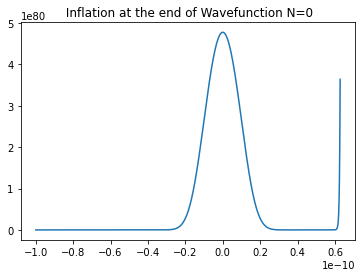

In [7]:
"""
The function solve_quant only outputs the wavefunction value at the boundary L.
If we want to integrate the wavefunction, we need to store ALL values of psi
"""
def solve_quant_store(E, V):
    psi_points = np.array([])
    psi = 0             # we know that the wave function psi is 0 at the boundaries, so this is the initial value
    phi = 1             # we don't know the value of phi (or dpsi/dt) at the boundaries, this is what Newman guessed
    r = np.array([psi, phi], float)
    
    for x in np.arange(-10*a, 10*a, h):
        psi_points = np.append(psi_points, r[0])
        k1 = h*f_quantum(r, x, E, V)
        k2 = h*f_quantum(r + 0.5*k1, x + 0.5*h, E, V)
        k3 = h*f_quantum(r + 0.5*k2, x + 0.5*h, E, V)
        k4 = h*f_quantum(r + k3, x + h, E, V)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        

    return psi_points

psi1 = solve_quant_store(anharm_energies[0]*e, V_anharm) # anharm_energies is in eV, we multiply e to convert back to S.I.
psi2 = solve_quant_store(anharm_energies[1]*e, V_anharm) # these are all numpy arrays containing psi vals
psi3 = solve_quant_store(anharm_energies[2]*e, V_anharm)

density1 = abs(psi1)**2    # I can hear Dr.Salvador saying "psi-star-psi ringing in my ears"
density2 = abs(psi2)**2
density3 = abs(psi3)**2

"""
Newman talks about large values at the end of the arrays holding the wave functions. We can see them in the graph below.
These are obviously spurious since we posited earlier that the wavefunction is zero at both boundaries. 

The value of psi before the spike is near 0 (but numpy translates that to exactly 0 for the user). This zero value is 
situated at the boundary L, but we solve for the wave function far beyond L (in fact, until 10a according to the problem).
This causes the code to divide by values very close to 0 after the boundary, which causes the spike. 
"""

fig,ax = plt.subplots()
ax.plot(np.arange(-10*a, 10*a, h)[0:-185], density1[0:-185]) # i guessed a range to add on the plot, to show that the wavefunction "blows up"
plt.title(' Inflation at the end of Wavefunction N=0')
plt.show()

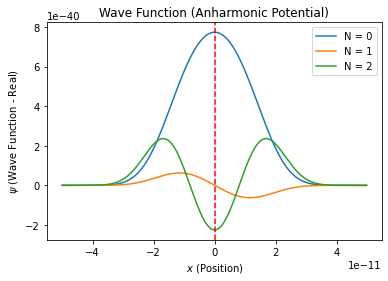

In [16]:
"""
We need to integrate the densities, but the answers will be infinite due to the spikes (which we don't want). Newman 
suggests that since the wave function is symmetric, what we can do is take the midpoint and then integrate the left side
and multiply by 2. 

Note that "infinity" for our purposes is basically x = 10a, which is a reasonably large distance. This is a program,
program's can't handle infinity itself...

To normalize the wavefunction, we use this very helpful link:
https://stackoverflow.com/questions/65612454/how-to-numerically-normalize-the-wave-function-of-the-schroedinger-equation
"""

def simp_int(density, n, a, b):   # n is the number of slices, a and b are the bounds, density is an array of psi-star-psi

    s = density[a] + density[b]   # these are the bounds, from left to midpoint as initial value for s
    
    for k in range(1, n, 2):      # we iterate over odds
        s += 4*density[a + k]
    for k in range(2, n, 2):      # we iterate over evens
        s += 2*density[a + k]
        
    s = s*(1/3)
    
    return 2*s          # return twice the integral, since we only got half the area

int1 = simp_int(density1, 1000, 0, len(density1)//2) # a bound is the 1st element, b bound is the middle element (floor div)
int2 = simp_int(density2, 1000, 0, len(density2)//2)
int3 = simp_int(density3, 1000, 0, len(density3)//2)

normal1 = psi1/np.sqrt(int1)      # now these are the normalized wave functions (see the link above)
normal2 = psi2/np.sqrt(int2)
normal3 = psi3/np.sqrt(int3)

"""
The wave functions have 1000 data points which represent the range [-10a, 10a]. If we want to plot [-5a, 5a], then
we need to slice [250:750]
"""
len(normal1)

# print(normal1[0:-185])
fig,ax = plt.subplots()



ax.plot(np.arange(-5*a, 5*a, h), normal1[250:750],label = "N = 0")
ax.plot(np.arange(-5*a, 5*a, h), normal2[250:750],label = "N = 1")
ax.plot(np.arange(-5*a, 5*a, h), normal3[250:750],label = "N = 2")


ax.set_title('Wave Function (Anharmonic Potential)')


plt.xlabel('$x $ (Position)')
plt.ylabel('$\psi$ (Wave Function - Real)')

# ax[0].set_xlabel('$x$')
# ax[0].set_ylabel('$\psi$')
# ax[1].set_xlabel('$x$')
# ax[1].set_ylabel('$\psi$')
# ax[2].set_xlabel('$x$')
# ax[2].set_ylabel('$\psi$')
plt.axvline(x=0, ls='--', color = 'red')
plt.legend()
plt.show()


##### Comments - Leo

- The states were not properly normalized
- **Score: 47/50**